### Challenge 8 Classification errors

##### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
import operator
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc

In [4]:
col_names = ['Class Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution',
             'physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban',
             'aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
             'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
df = pd.read_csv('/home/kalgi/Downloads/votes_data.txt', names=col_names, header=None)
df1 = df.replace(['y', 'n','?'], [1, 0, None])
df2 = df1.fillna(df1.mean()) 
X = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y = df2['Class Name']

In [5]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=4444)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.98
Test Data Accuracy:     0.94
[[75  2]
 [ 6 48]]


Precision:              0.93
Recall:                 0.97


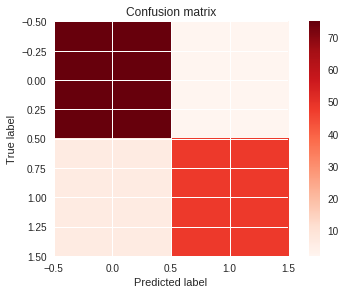

In [6]:
log_clf=LogisticRegression()
train_score(log_clf,X,y)

##### Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [7]:
df3 = df2.replace(['republican', 'democrat'], [0, 1])
X1 = df3.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y1 = df3['Class Name']

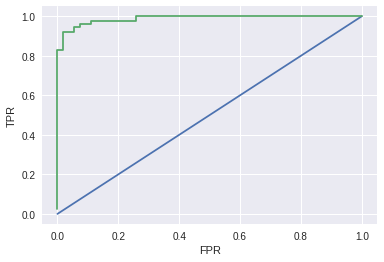

In [8]:
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X1, y1, test_size=0.3, random_state=4444)
log = LogisticRegression()
log.fit(xtrain,np.ravel(ytrain))
y_score=log.predict_proba(xtest)[:,1]

fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

##### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [10]:
precision = cross_val_score(log_clf, X1, y1, cv=10, scoring='precision').mean()
recall = cross_val_score(log_clf, X1, y1, cv=10, scoring='recall').mean()
F1_score = 2*(precision*recall/precision+recall)

##### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [11]:
movies = pd.read_csv('/home/kalgi/ds/metis/sf17_ds8/challenges/challenges_data/2013_movies.csv')

In [12]:
movies = movies.fillna(0)
X8 = movies.loc[:, 'Budget':'DomesticTotalGross']
y8 = movies['Rating']
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.4, random_state=42)
knn8 = LogisticRegression()
knn8.fit(X_train8, y_train8)
y_pred8 = knn8.predict(X_test8)
scores8 = metrics.accuracy_score(y_test8, y_pred8)
scores8

0.67500000000000004

In [13]:
precision8 = cross_val_score(knn8, X1, y1, cv=10, scoring='precision').mean()
recall8 = cross_val_score(knn8, X1, y1, cv=10, scoring='recall').mean()
F1_score8 = 2*(precision*recall/precision+recall)

##### Challenge 5
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [14]:
column_names = ['Age of patient at time of operation', 'Patients year of operation','Number of positive axillary nodes detected',
'Survival status']
haberman = pd.read_csv('/home/kalgi/Downloads/data.txt', names=column_names, header=None)

In [15]:
X9 = haberman.loc[:, 'Age of patient at time of operation':'Number of positive axillary nodes detected']
y9 = haberman['Survival status']
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.3, random_state=42)
knn9 = LogisticRegression()
knn9.fit(X_train9, y_train9)
y_pred9 = knn9.predict(X_test9)
scores9 = metrics.accuracy_score(y_test9, y_pred9)
scores9

0.73913043478260865

In [16]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.3, random_state=42)
knn9 = LogisticRegression()
knn9.fit(X_train9, y_train9)
y_pred9 = knn9.predict(X_test9)[:,1]
scores9 = metrics.accuracy_score(y_test9, y_pred9)

fpr, tpr,_ = roc_curve(y_test9, y_score9)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

IndexError: too many indices for array